In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import scipy.linalg as la

In /home/utkarsh/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/utkarsh/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/utkarsh/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/utkarsh/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/utkarsh/.local/lib/python3.6/site-packages/matplotlib/mpl-d

## Question 1

In [35]:
def plot_graphs(num_samples, samples):
    fig, ax = plt.subplots(2, 2, figsize=(8, 6))
    fig.suptitle(f"Number of Samples = {num_samples}")
    ax[0, 0].hist(samples["multinomial"], bins=[0, 1, 2, 3, 4], density=True, align='left', rwidth=0.1)
    ax[0, 0].title.set_text("Multinomial")
    
    ax[0, 1].hist(samples["uniform"], bins=10, density=True)
    ax[0, 1].plot(np.linspace(0, 1, 1000), [1]*1000, label="True PDF")
    ax[0, 1].title.set_text("Uniform")
    ax[0, 1].legend()
    
    ax[1, 0].hist(samples["normal"], bins=100, density=True)
    X = np.linspace(-4, 4, 10000)
    ax[1, 0].plot(X, norm(0, 1).pdf(X), label="True PDF")
    ax[1, 0].title.set_text("Normal")
    ax[1, 0].legend()
    
    ax[1, 1].hist(samples["expo"], bins=100, density=True)
    X = np.linspace(0, 10, 1000)
    ax[1, 1].plot(X, 0.5*np.exp(-0.5*X), label="True PDF")
    ax[1, 1].title.set_text("Exponential")
    ax[1, 1].legend()
    
    for a in ax[1, :].flat:
        a.set(xlabel='X', ylabel='Density or Fraction')
    ax[0, 0].set(ylabel='Density or Fraction')
        
    plt.savefig(f"tmp/Q1_{num_samples}")
    plt.show()

In [36]:
def generate_samples(num_samples):
    samples = {
        "multinomial": np.argmax(np.random.multinomial(1, [0.2, 0.4, 0.3, 0.1], size=(num_samples,)), axis=1),
        "uniform": np.random.uniform(low=0.0, high=1.0, size=(num_samples, )),
        "normal": np.random.normal(loc=0.0, scale=1.0, size=(num_samples, )),
        "expo": np.random.exponential(scale=2.0, size=(num_samples, ))
    }

    plot_graphs(num_samples, samples)

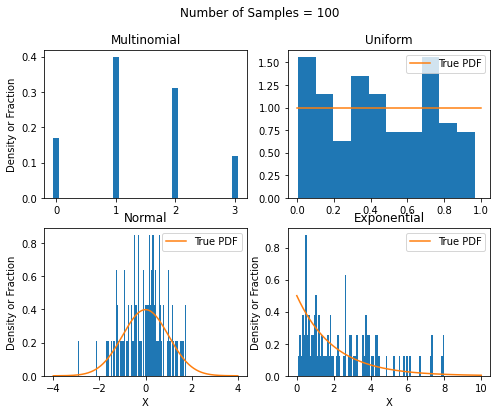

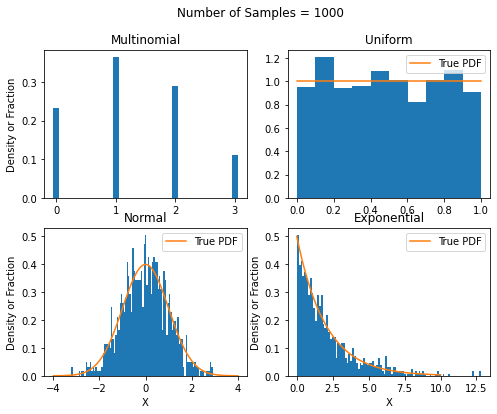

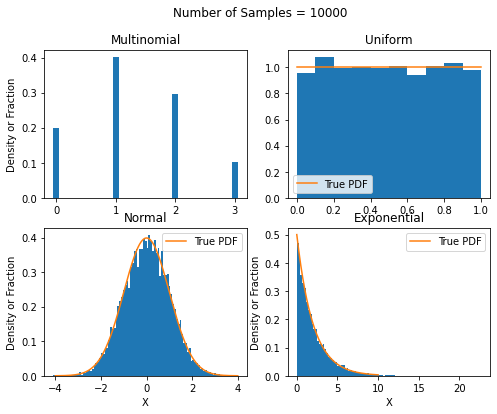

In [37]:
for i in [100, 1000, 10000]:
    generate_samples(i)

## Question 2
#### Solution 1

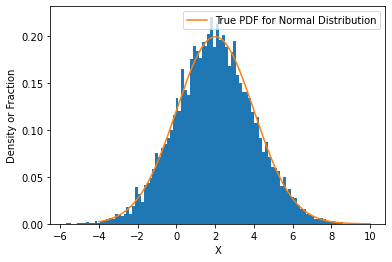

In [7]:
samples = []

n = 10000
mu = 2
sigma = 2

for i in range(10000):
    U = np.random.uniform(low=0.0, high=1.0, size=(n, ))
    X = np.sqrt(n)*((U.mean() - 0.5)/np.sqrt(1/12))
    X = sigma*X + mu
    samples.append(X)

y = norm(2, 2).pdf(np.linspace(-4, 10, 10000))    

plt.figure()
plt.hist(samples, bins=100, density=True)
plt.plot(np.linspace(-4, 10, 10000), y, label='True PDF for Normal Distribution')
plt.xlabel('X')
plt.ylabel('Density or Fraction')
plt.legend()
plt.savefig('tmp/Q2_1.png')
plt.show()

#### Solution 2

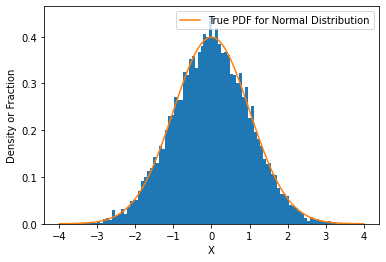

In [49]:
U = np.random.uniform(low=0.0, high=1.0, size=(10000, ))
X = norm.ppf(U)
y = norm(0, 1).pdf(np.linspace(-4, 4, 10000))

plt.figure()
plt.hist(X, bins=100, density=True)
plt.plot(np.linspace(-4, 4, 10000), y, label='True PDF for Normal Distribution')
plt.xlabel('X')
plt.ylabel('Density or Fraction')
plt.legend()
plt.savefig('tmp/Q2.png')
plt.show()

## Question 3

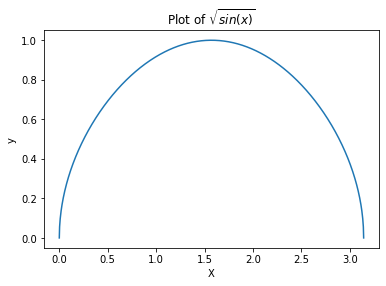

In [47]:
X = np.linspace(0, np.pi, 1000)
y = np.sqrt(np.sin(X))

plt.figure()
plt.plot(X, y)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Plot of $ \sqrt{sin(x)}$')
plt.savefig("tmp/Q3_1.png")
plt.show()

In [44]:
num_samples = 10000

def sqrt_sin(X):
    return np.sqrt(np.sin(X))

X = np.random.uniform(low=0.0, high=np.pi, size=(num_samples, ))
A = np.sum(np.pi*sqrt_sin(X))/num_samples

print("The area of sqrt(sin(x)) is", A)

The area of sqrt(sin(x)) is 2.4061907079036167


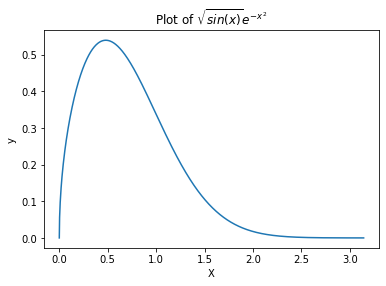

In [48]:
X = np.linspace(0, np.pi, 1000)
y = np.sqrt(np.sin(X))*np.exp(-X**2)

plt.figure()
plt.plot(X, y)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Plot of $ \sqrt{sin(x)}e^{-x^2}$')
plt.savefig("tmp/Q3_2.png")
plt.show()

#### Using Normal Random Variable

In [3]:
def sample_from_adjusted_normal(num_samples):
    samples = []
    while len(samples) != num_samples:
        sample = np.abs(np.random.normal(loc=0.0, scale=1/np.sqrt(2)))
        
        if sample <= np.pi:
            samples.append(sample)
    
    return np.array(samples) 

In [3]:
num_samples = 10000

X = np.random.uniform(low=0.0, high=np.pi, size=(num_samples, ))
C = 2*np.sqrt(2)*(np.sum(np.exp(-X**2))/num_samples)

print("Pr(|X| < pi) where X is Normal with mean=0 and variance=1/2 is", C)

Pr(|X| < pi) where X is Normal with mean=0 and variance=1/2 is 0.795621689414939


In [10]:
num_samples = 10

X = sample_from_adjusted_normal(num_samples)
y = np.sqrt(np.sin(X))
A = np.pi*np.sum(y)*C/(2*num_samples*np.sqrt(2))

print("The area of sqrt(sin(x))exp(-x^2) is", A)

The area of sqrt(sin(x))exp(-x^2) is 0.5708995803498533


In [11]:
num_samples = 10

def sqrt_sin_exp(X):
    return np.sqrt(np.sin(X))*np.exp(-X**2)

X = np.random.uniform(low=0.0, high=np.pi, size=(num_samples, ))
A = np.sum(np.pi*sqrt_sin_exp(X))/num_samples

print("The area of sqrt(sin(x))exp(-x^2) is", A)

The area of sqrt(sin(x))exp(-x^2) is 0.501713317256825


## Question 4

#### Simulation

In [28]:
def simulate(total_time=10000):
    present_state = 0
    for i in range(total_time):
        present_state += np.random.choice(3, p=[2/3, 1/6, 1/6])
        if present_state == 2 or present_state == 4:
            return 0
        elif present_state > 4:
            return 1

In [29]:
num_simulations = 100000
time = 10000
reached_8 = 0

for i in range(num_simulations):
    reached_8 += simulate()
    
print("The probability of reaching the end state through simulation is", reached_8/num_simulations)

The probability of reaching the end state through simulation is 0.12555


#### Analytic Solution

In [31]:
P = np.array([[2/3, 1/6, 1/6, 0, 0, 0, 0, 0, 0],
             [0, 2/3, 1/6, 1/6, 0, 0, 0, 0, 0],
             [0, 0, 0, 0, 1, 0, 0, 0, 0],
             [0, 0, 0, 2/3, 1/6, 1/6, 0, 0, 0],
             [0, 0, 1, 0, 0, 0, 0, 0, 0],
             [0, 0, 0, 0, 0, 2/3, 1/6, 1/6, 0],
             [0, 0, 0, 0, 0, 0, 2/3, 1/6, 1/6],
             [0, 0, 0, 0, 0, 0, 0, 5/6, 1/6],
             [0, 0, 0, 0, 0, 0, 0, 0, 1]])

pi_0 = s0 = np.array([[1] + [0]*8])

In [33]:
results = la.eig(P.T)
results[0]

array([ 1.        +0.j, -1.        +0.j,  1.        +0.j,  0.83333333+0.j,
        0.66666667+0.j,  0.66666667+0.j,  0.66666667+0.j,  0.66666667+0.j,
        0.66666667+0.j])

The largest eigenvalue of P = 1. <br />
We therefore, find the value of the summation for upto time stamp T=10,000.

In [34]:
def get_matrix_powers(A, num_iterations):
    x = np.eye(A.shape[0])
    for i in range(1, num_iterations+1):
        x = np.dot(x, A)
        yield x

In [36]:
num_iterations = 10000
I = get_matrix_powers(A, num_iterations)
next(I)
next(I)
next(I)

prob = 0

for i in range(4, num_iterations+1):
    S = next(I)
    prob += (S[0, 6]/6 + S[0, 7]/6)
    
print("The probability of reaching the end state is", prob)

The probability of reaching the end state is 0.12499999999999986


Long Run behaviour of the chain.

In [50]:
s0 = np.array([[1] + [0]*8])
Q = np.array([[2/3, 1/6, 1/6, 0, 0, 0, 0, 0, 0],
             [0, 2/3, 1/6, 1/6, 0, 0, 0, 0, 0],
             [0, 0, 0, 0, 1, 0, 0, 0, 0],
             [0, 0, 0, 2/3, 1/6, 1/6, 0, 0, 0],
             [0, 0, 1, 0, 0, 0, 0, 0, 0],
             [0, 0, 0, 0, 0, 2/3, 1/6, 1/6, 0],
             [0, 0, 0, 0, 0, 0, 2/3, 1/6, 1/6],
             [0, 0, 0, 0, 0, 0, 0, 5/6, 1/6],
             [0, 0, 0, 0, 0, 0, 0, 0, 1]])

max_iter = 100000
s = s0
for i in range(max_iter):
    s1 = np.dot(s, Q)
    if np.allclose(s1, s):
        print(i)
        print(s1)
        print(s)
        break
    
    if i == max_iter - 1:
        print(s1)
        print(s)
    s = s1

[[4.94e-324 4.94e-324 3.93e-001 4.94e-324 4.82e-001 4.94e-324 4.94e-324
  1.48e-323 1.25e-001]]
[[4.94e-324 4.94e-324 4.82e-001 4.94e-324 3.93e-001 4.94e-324 4.94e-324
  1.48e-323 1.25e-001]]


In [51]:
np.dot(s, Q)

array([[4.94e-324, 4.94e-324, 4.82e-001, 4.94e-324, 3.93e-001, 4.94e-324,
        4.94e-324, 1.48e-323, 1.25e-001]])